In [1]:
from Chelyabinsk import Chelyabinsk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Using Chelyabinsk class to estimate parameters

We define a class which provide a data_path when instantiating it. we provide two loss_fumctiom. The one is calculate the difference between peak point in real data and solver_ode outcome, the other one is to measure root mean square error between solver_ode outcome and our interplot-model outcome. Finally, we use scipy.optimize.minimize to get the best fit params. 

### Create an object and check whether our self params have been created correctly.

```python
def __init__(self, data_path='./resources/ChelyabinskEnergyAltitude.csv')
```

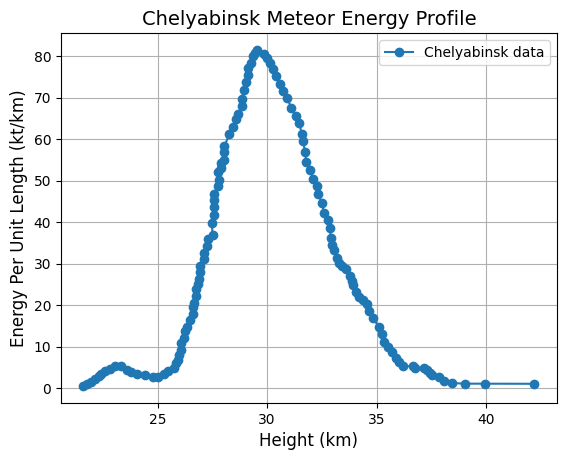

In [2]:
# Assuming 'a' is an instance of your Chelyabinsk class
a = Chelyabinsk()  

plt.plot(a.data.Height_km, a.data.Energy_kt_km, label='Chelyabinsk data', marker='o', linestyle='-')
plt.xlabel('Height (km)', fontsize=12)  # Larger font size for x-axis label
plt.ylabel('Energy Per Unit Length (kt/km)', fontsize=12)  # Larger font size for y-axis label
plt.title('Chelyabinsk Meteor Energy Profile', fontsize=14)  # Title for the plot
plt.grid(True)  # Enable grid
plt.legend(fontsize=10)  # Legend with a smaller font size
plt.show()  # Show the plot


In [3]:
# This is our interplot dunction
print(f'the type of interpolate is f{type(a.f)}')
print(f"the max height is: {a.max}km")
print(f'the min height is: {a.min}km')

the type of interpolate is f<class 'scipy.interpolate._interpolate.interp1d'>
the max height is: 42.1922km
the min height is: 21.6192km


### test our interpolate function

We use scipy.interpolate.interp1d with quadratic and considering density of data point, We interpolate at intervals of two points.
```python
interp_func = interp1d(x_observed[::3], y_observed[::3], kind='quadratic', fill_value='extrapolate')
```

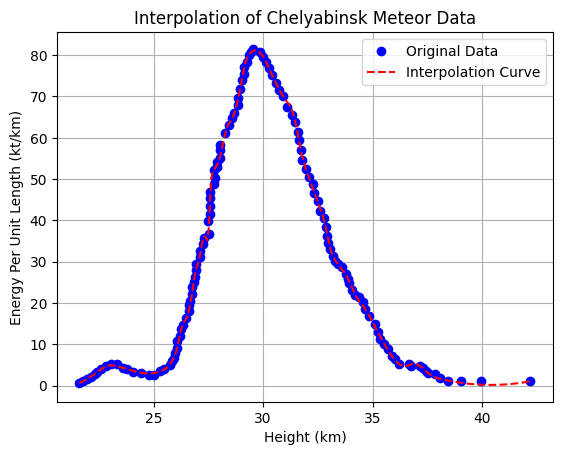

In [4]:
# Generate a range of height values for interpolation
height_values = np.linspace(a.min, a.max, 500)
# Compute the interpolated energy values for these heights
interpolated_energy = a.f(height_values)

# Plotting the original data
plt.plot(a.data.Height_km, a.data.Energy_kt_km, 'o', label='Original Data', color='blue')

# Plotting the interpolation curve
plt.plot(height_values, interpolated_energy, label='Interpolation Curve', color='red', linestyle='--')

# Adding labels, title, and legend
plt.xlabel('Height (km)')
plt.ylabel('Energy Per Unit Length (kt/km)')
plt.title('Interpolation of Chelyabinsk Meteor Data')
plt.legend()
plt.grid(True)
plt.show()

## Demonstrate solve_ode function

```python
def solve_ode(self, radius=55, strength=5e7, dt=0.01, planet=deepimpact.Planet()):
    ...
    return result_with_energy.altitude, result_with_energy.dedz
```
In this part, we fix params except radius and strength and will return a tuple
```python
    velocity = 19.2e3  # Velocity in meters per second
    density = 3300     # Density in kg/m^3
    angle = 18.3       # Angle in degrees
```
```python
    """
    Returns
    -------
    tuple
        A tuple containing arrays of altitude (km) and energy (kt/km).
    """
```


In [5]:
info = a.solve_ode(radius=8.5, strength=4e6)
print(f'the type of return is: {type(info)}')
altitude_km, energy_kt_km = info

the type of return is: <class 'tuple'>


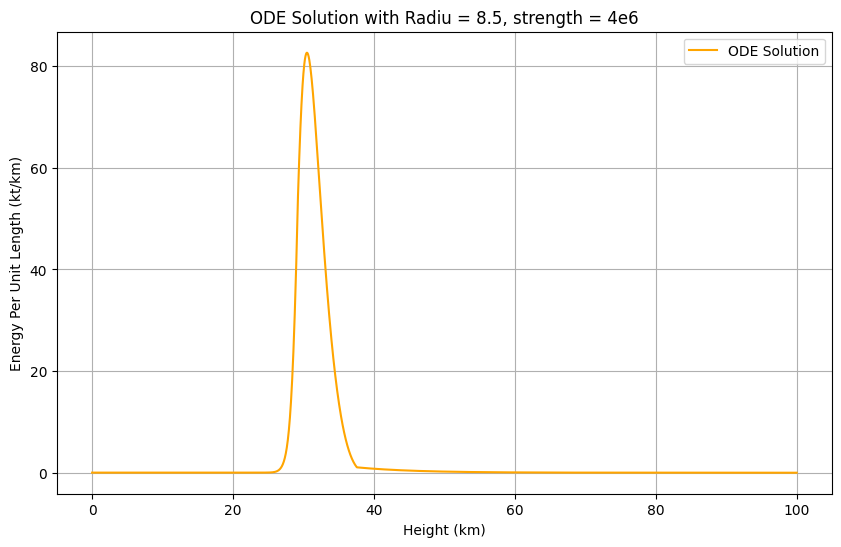

In [6]:

# Plot the ODE solution
plt.figure(figsize=(10, 6))
plt.plot(altitude_km, energy_kt_km, label='ODE Solution', linestyle='-', marker='None', color='orange')

# Optionally, annotate the peak energy
peak_idx = np.argmax(energy_kt_km)

# Set plot labels and title
plt.xlabel('Height (km)')
plt.ylabel('Energy Per Unit Length (kt/km)')
plt.title('ODE Solution with Radiu = 8.5, strength = 4e6')
plt.legend()
plt.grid(True)
plt.show()

## Demonstrate our loss_function

### norm2

In [7]:
# Calculate the norm2 loss using the same parameters as in solve_ode
norm2_loss_value = a.norm2_loss([8.2, 5e6])
print(f"Norm2 Loss: {norm2_loss_value}")

Norm2 Loss: 0.10675241055858672


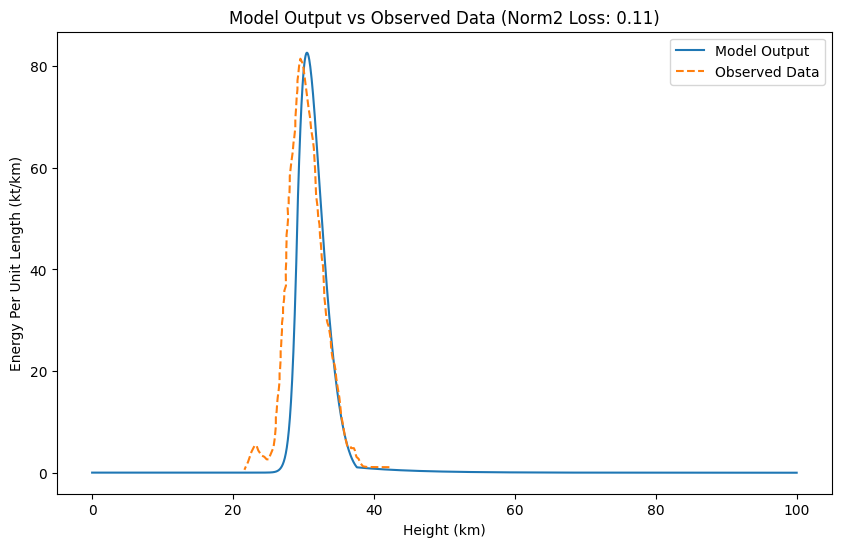

In [8]:
# Plotting the model output and observed data for visual comparison
plt.figure(figsize=(10, 6))
plt.plot(altitude_km, energy_kt_km, label='Model Output')
plt.plot(a.data.Height_km, a.data.Energy_kt_km, label='Observed Data', linestyle='--')
plt.xlabel('Height (km)')
plt.ylabel('Energy Per Unit Length (kt/km)')
plt.title(f'Model Output vs Observed Data (Norm2 Loss: {norm2_loss_value:.2f})')
plt.legend()
plt.show()

### RMSE

In [9]:
# Computing the RMSE loss using the same parameters
rmse_loss_value = a.rmse_loss([8.2, 5e6])
print(f"RMSE Loss: {rmse_loss_value}")

RMSE Loss: 6.316693544495229


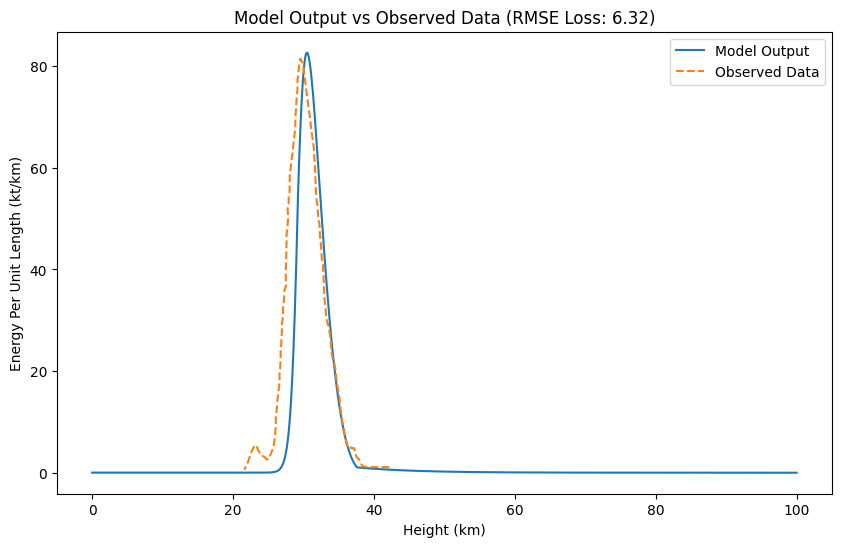

In [10]:
# Visualization of model output vs observed data with RMSE Loss
plt.figure(figsize=(10, 6))
plt.plot(altitude_km, energy_kt_km, label='Model Output')
plt.plot(a.data.Height_km, a.data.Energy_kt_km, label='Observed Data', linestyle='--')
plt.xlabel('Height (km)')
plt.ylabel('Energy Per Unit Length (kt/km)')
plt.title(f'Model Output vs Observed Data (RMSE Loss: {rmse_loss_value:.2f})')
plt.legend()
plt.show()

We find that our Norm2 Loss: 0.10675241055858672 and RMSE Loss: 6.316693544495229 which means that even though heavy point is very close but the overall error still cannot be ignored. 

**Conclusion:**

Simply using the highest point approximation cannot be very accurate, but considering the computational cost, it can be used to estimate `radiu` and `strength` within an acceptable range.

## Optimize function and test function

Our optimize function allow people use either `norm2` or `rmse` as loss_function, We will minize our loss function with an initial guess. The intial guess is really impotant in our project. 

This function will store the result as self.result and return it.

The test function is used to illustrate result and print rmse

In [11]:
a.optimize(func='norm2') 

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.10186000089281894
        x: [ 8.201e+00  5.000e+06]
      nit: 5
      jac: [-5.795e-06  0.000e+00]
 hess_inv: [[ 1.662e-04  0.000e+00]
            [ 0.000e+00  1.000e+00]]
     nfev: 36
     njev: 12

RMSE: 6.312493801554341


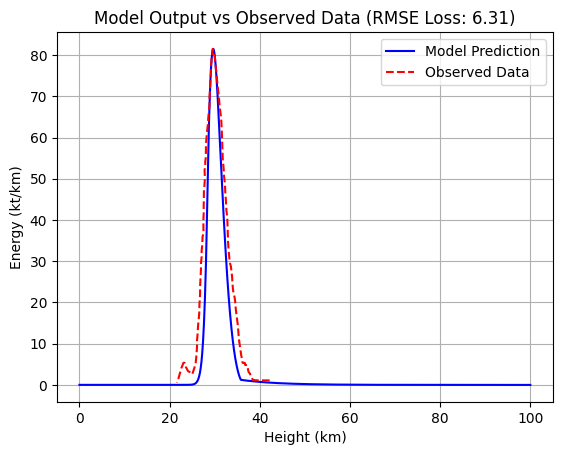

In [12]:
a.test()

In [13]:
a.optimize('rmse')

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.066819805031258
        x: [ 8.929e+00  5.000e+06]
      nit: 3
      jac: [-3.576e-07  0.000e+00]
 hess_inv: [[ 1.141e-01  0.000e+00]
            [ 0.000e+00  1.000e+00]]
     nfev: 18
     njev: 6

RMSE: 5.066819805031258


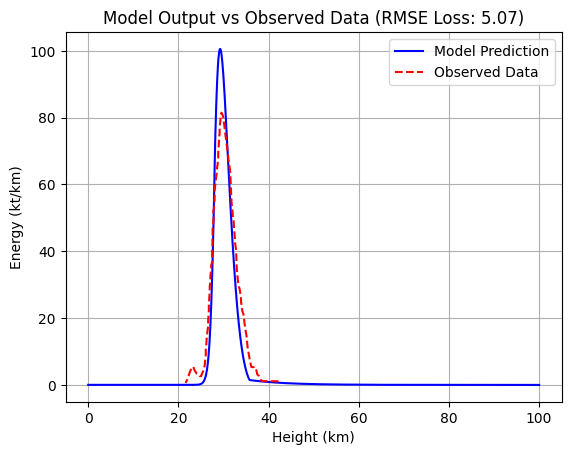

In [14]:
a.test()

**Conclusion:**

Comparing these two loss_function, obciously, we prefer norm2 to approachthe high energy loss point on Chelyabinsk.